   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Preparacion)


In [28]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import os, glob

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "1D"
NUM_FEATURES = 0

In [31]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/dukas/EURUSD/'+FRECUENCIA+'/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

EURUSD_Candlestick_1_D_ASK_31.12.2003-30.05.2020.csv
EURUSD_Candlestick_1_D_BID_31.12.2003-30.05.2020.csv


## Read CSV

### Read Ask Dataset

In [32]:
index_ask = 0
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')
DATASET_ASK = pd.read_csv(filenames[index_ask], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
print(DATASET_ASK)
print(DATASET_ASK.shape)

       Gmt time     Open     High      Low    Close        Volume
0    2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05
1    2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06
2    2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04
3    2004-01-05  1.26324  1.26935  1.26301  1.26830  1.119689e+06
4    2004-01-06  1.26836  1.28093  1.26666  1.27150  1.125442e+06
...         ...      ...      ...      ...      ...           ...
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  2.219154e+05
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  3.392159e+05
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  2.907155e+05
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  3.306924e+05
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158  1.012642e+04

[5137 rows x 6 columns]
(5137, 6)


### Read Bid Dataset

In [33]:
index_bid = 1
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')
DATASET_BID = pd.read_csv(filenames[index_bid], header=0, parse_dates=['Gmt time'], date_parser=dateparse, 
                          names=['Gmt time','Open_Bid','High_Bid',"Low_Bid","Close_Bid","Volume_Bid"])
print(DATASET_BID)
print(DATASET_BID.shape)

       Gmt time  Open_Bid  High_Bid  Low_Bid  Close_Bid    Volume_Bid
0    2004-01-01   1.25934   1.26035  1.24679    1.25723  5.597896e+05
1    2004-01-02   1.25701   1.26263  1.25198    1.25806  1.277971e+06
2    2004-01-04   1.25855   1.26477  1.25779    1.26308  8.372040e+04
3    2004-01-05   1.26308   1.26924  1.26288    1.26820  1.353480e+06
4    2004-01-06   1.26820   1.28083  1.26650    1.27140  1.354807e+06
...         ...       ...       ...      ...        ...           ...
5132 2020-05-26   1.09015   1.09957  1.08969    1.09784  2.075363e+05
5133 2020-05-27   1.09785   1.10307  1.09340    1.10166  3.194905e+05
5134 2020-05-28   1.10165   1.10934  1.09916    1.10779  2.312052e+05
5135 2020-05-29   1.10778   1.11451  1.10698    1.11036  3.730174e+05
5136 2020-05-31   1.11129   1.11195  1.11023    1.11156  9.217483e+03

[5137 rows x 6 columns]
(5137, 6)


### Merge 2 Datasets ASK + BID

In [34]:
DATASET_FULL = pd.merge(DATASET_ASK,DATASET_BID)
print(DATASET_FULL)

       Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0    2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1    2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2    2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   
3    2004-01-05  1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   
4    2004-01-06  1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   
...         ...      ...      ...      ...      ...           ...       ...   
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  2.219154e+05   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  3.392159e+05   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  2.907155e+05   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  3.306924e+05   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158  1.012642e+04   1.11129   

      High_Bid  Low_Bid  Close_Bid    Volume_Bid  


### Add Col 'Spread' 

In [35]:
DATASET_FULL['Spread'] = DATASET_FULL['Close'] - DATASET_FULL['Close_Bid']
print(DATASET_FULL['Spread'].describe())
print(DATASET_FULL.head(5))

count    5137.000000
mean        0.000118
std         0.000128
min         0.000010
25%         0.000040
50%         0.000100
75%         0.000120
max         0.002280
Name: Spread, dtype: float64
    Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0 2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1 2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2 2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   
3 2004-01-05  1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   
4 2004-01-06  1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   

   High_Bid  Low_Bid  Close_Bid    Volume_Bid   Spread  
0   1.26035  1.24679    1.25723  5.597896e+05  0.00010  
1   1.26263  1.25198    1.25806  1.277971e+06  0.00026  
2   1.26477  1.25779    1.26308  8.372040e+04  0.00010  
3   1.26924  1.26288    1.26820  1.353480e+06  0.00010  
4   1.28083  1.26650    1.27140  1.354807e+06  0.00010  


### Add Col 'day_name' and 'weekday'

In [36]:
DATASET_FULL['day_name'] = DATASET_FULL['Gmt time'].dt.day_name()
DATASET_FULL['weekday'] = DATASET_FULL['Gmt time'].dt.weekday
print(DATASET_FULL.head(5))

    Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0 2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1 2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2 2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   
3 2004-01-05  1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   
4 2004-01-06  1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   

   High_Bid  Low_Bid  Close_Bid    Volume_Bid   Spread  day_name  weekday  
0   1.26035  1.24679    1.25723  5.597896e+05  0.00010  Thursday        3  
1   1.26263  1.25198    1.25806  1.277971e+06  0.00026    Friday        4  
2   1.26477  1.25779    1.26308  8.372040e+04  0.00010    Sunday        6  
3   1.26924  1.26288    1.26820  1.353480e+06  0.00010    Monday        0  
4   1.28083  1.26650    1.27140  1.354807e+06  0.00010   Tuesday        1  


### Add Col 'pct_range_Close' 

In [37]:
DATASET_FULL['Pct_Range_Close'] = DATASET_FULL['Close'].pct_change()
DATASET_FULL['Pct_Range_Close'].fillna(0, inplace=True)
print(DATASET_FULL.head())
print(DATASET_FULL.shape)


    Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0 2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1 2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2 2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   
3 2004-01-05  1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   
4 2004-01-06  1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   

   High_Bid  Low_Bid  Close_Bid    Volume_Bid   Spread  day_name  weekday  \
0   1.26035  1.24679    1.25723  5.597896e+05  0.00010  Thursday        3   
1   1.26263  1.25198    1.25806  1.277971e+06  0.00026    Friday        4   
2   1.26477  1.25779    1.26308  8.372040e+04  0.00010    Sunday        6   
3   1.26924  1.26288    1.26820  1.353480e+06  0.00010    Monday        0   
4   1.28083  1.26650    1.27140  1.354807e+06  0.00010   Tuesday        1   

   Pct_Range_Close  
0         0.000000  
1         0.000787  
2         0.00386

### Differnce Function

In [38]:
def difference(dataset, interval, col_name):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.DataFrame(diff, columns = [col_name + "_diff"])

### Add Col 'Pct_Range_Close_diff' 

In [39]:
DATASET_FULL['Pct_Range_Close_diff'] = difference(DATASET_FULL['Pct_Range_Close'],1,'Pct_Range_Close').shift(1)
DATASET_FULL['Pct_Range_Close_diff'].fillna(0, inplace=True)
print(DATASET_FULL.head())
print(DATASET_FULL.shape)

    Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0 2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1 2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2 2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   
3 2004-01-05  1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   
4 2004-01-06  1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   

   High_Bid  Low_Bid  Close_Bid    Volume_Bid   Spread  day_name  weekday  \
0   1.26035  1.24679    1.25723  5.597896e+05  0.00010  Thursday        3   
1   1.26263  1.25198    1.25806  1.277971e+06  0.00026    Friday        4   
2   1.26477  1.25779    1.26308  8.372040e+04  0.00010    Sunday        6   
3   1.26924  1.26288    1.26820  1.353480e+06  0.00010    Monday        0   
4   1.28083  1.26650    1.27140  1.354807e+06  0.00010   Tuesday        1   

   Pct_Range_Close  Pct_Range_Close_diff  
0         0.000000              0.000

### Accumulative Volume


In [40]:
def AQV(df):
    df['AQV'] = df['Volume'].cumsum()
    return df

In [41]:
DATASET_FULL = AQV(DATASET_FULL)
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Spread,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV
0,2004-01-01,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,5.597896e+05,0.00010,Thursday,3,0.000000,0.000000,4.621817e+05
1,2004-01-02,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,1.277971e+06,0.00026,Friday,4,0.000787,0.000787,1.528760e+06
2,2004-01-04,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,8.372040e+04,0.00010,Sunday,6,0.003862,0.003075,1.597559e+06
3,2004-01-05,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,1.353480e+06,0.00010,Monday,0,0.004053,0.000191,2.717248e+06
4,2004-01-06,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,1.354807e+06,0.00010,Tuesday,1,0.002523,-0.001530,3.842691e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,2020-05-26,1.09019,1.09960,1.08970,1.09787,2.219154e+05,1.09015,1.09957,1.08969,1.09784,2.075363e+05,0.00003,Tuesday,1,0.007045,0.007631,2.134402e+09
5133,2020-05-27,1.09788,1.10311,1.09342,1.10169,3.392159e+05,1.09785,1.10307,1.09340,1.10166,3.194905e+05,0.00003,Wednesday,2,0.003479,-0.003565,2.134742e+09
5134,2020-05-28,1.10168,1.10937,1.09919,1.10782,2.907155e+05,1.10165,1.10934,1.09916,1.10779,2.312052e+05,0.00003,Thursday,3,0.005564,0.002085,2.135032e+09
5135,2020-05-29,1.10780,1.11452,1.10702,1.11071,3.306924e+05,1.10778,1.11451,1.10698,1.11036,3.730174e+05,0.00035,Friday,4,0.002609,-0.002955,2.135363e+09


In [42]:
print(DATASET_FULL['AQV'].describe())
print(DATASET_FULL['AQV'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['AQV'].isnull().sum())

count    5.137000e+03
mean     1.453551e+09
std      5.500467e+08
min      4.621817e+05
25%      1.225860e+09
50%      1.607201e+09
75%      1.820627e+09
max      2.135373e+09
Name: AQV, dtype: float64
0
0


(5137, 17)


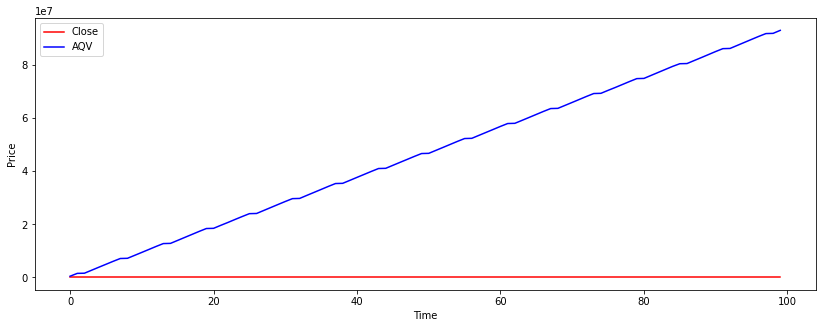

In [43]:
INICIO = 0
FIN = 100
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['AQV'][INICIO:FIN], color = 'blue', label = 'AQV')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

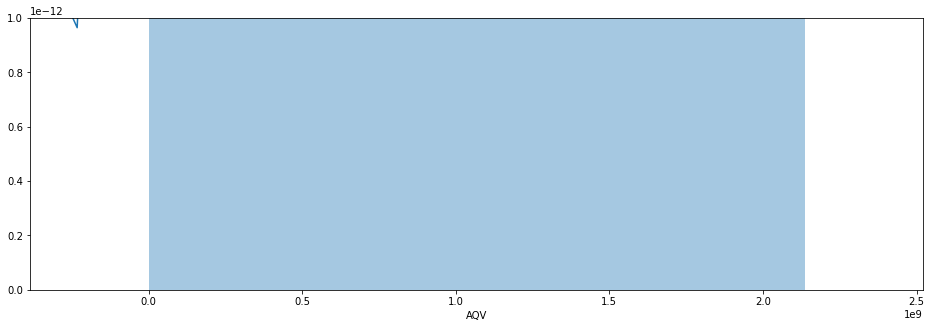

In [44]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['AQV']);

### Accumulative Pct_Range_Close_diff

In [45]:
def AQM_Pct_Range_Close_diff(df):
    df['AQM_Pct_Range_Close_diff'] = df['Pct_Range_Close_diff'].cumsum()
    return df

In [46]:
DATASET_FULL = AQM_Pct_Range_Close_diff(DATASET_FULL)
print(DATASET_FULL.head(3))

    Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0 2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1 2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2 2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   

   High_Bid  Low_Bid  Close_Bid    Volume_Bid   Spread  day_name  weekday  \
0   1.26035  1.24679    1.25723  5.597896e+05  0.00010  Thursday        3   
1   1.26263  1.25198    1.25806  1.277971e+06  0.00026    Friday        4   
2   1.26477  1.25779    1.26308  8.372040e+04  0.00010    Sunday        6   

   Pct_Range_Close  Pct_Range_Close_diff           AQV  \
0         0.000000              0.000000  4.621817e+05   
1         0.000787              0.000787  1.528760e+06   
2         0.003862              0.003075  1.597559e+06   

   AQM_Pct_Range_Close_diff  
0                  0.000000  
1                  0.000787  
2                  0.003862  


In [47]:
print(DATASET_FULL['AQM_Pct_Range_Close_diff'].describe())
print(DATASET_FULL['AQM_Pct_Range_Close_diff'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['AQM_Pct_Range_Close_diff'].isnull().sum())

count    5137.000000
mean       -0.000009
std         0.005475
min        -0.027025
25%        -0.002669
50%        -0.000053
75%         0.002737
max         0.034948
Name: AQM_Pct_Range_Close_diff, dtype: float64
0
0


(5137, 18)


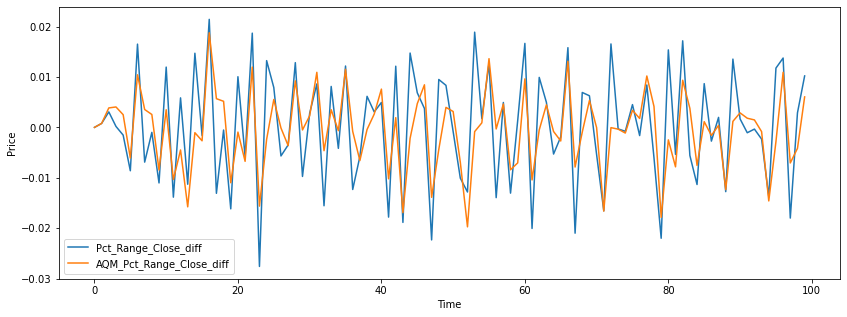

In [48]:
INICIO = 0
FIN = 100
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['Pct_Range_Close_diff'][INICIO:FIN], label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['AQM_Pct_Range_Close_diff'][INICIO:FIN], label = 'AQM_Pct_Range_Close_diff')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

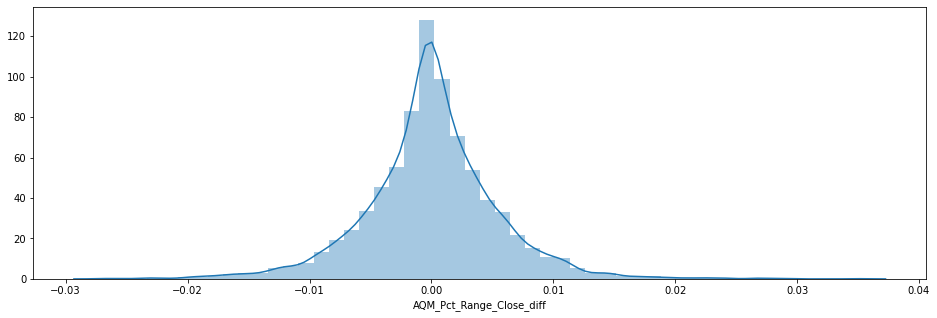

In [49]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['AQM_Pct_Range_Close_diff']);


### Accumulative Pct Change

In [50]:
def AQM_Pct_Range_Close(df):
    df['AQM_Pct_Range_Close'] = df['Pct_Range_Close'].cumsum()
    return df

In [51]:
DATASET_FULL = AQM_Pct_Range_Close(DATASET_FULL)
print(DATASET_FULL.head(3))

    Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0 2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1 2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2 2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   

   High_Bid  Low_Bid  Close_Bid    Volume_Bid   Spread  day_name  weekday  \
0   1.26035  1.24679    1.25723  5.597896e+05  0.00010  Thursday        3   
1   1.26263  1.25198    1.25806  1.277971e+06  0.00026    Friday        4   
2   1.26477  1.25779    1.26308  8.372040e+04  0.00010    Sunday        6   

   Pct_Range_Close  Pct_Range_Close_diff           AQV  \
0         0.000000              0.000000  4.621817e+05   
1         0.000787              0.000787  1.528760e+06   
2         0.003862              0.003075  1.597559e+06   

   AQM_Pct_Range_Close_diff  AQM_Pct_Range_Close  
0                  0.000000             0.000000  
1                  0.000787             0.000787  


In [52]:
print(DATASET_FULL['AQM_Pct_Range_Close'].describe())
print(DATASET_FULL['AQM_Pct_Range_Close'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['AQM_Pct_Range_Close'].isnull().sum())

count    5137.000000
mean        0.043743
std         0.085877
min        -0.122316
25%        -0.033411
50%         0.040605
75%         0.110361
max         0.256182
Name: AQM_Pct_Range_Close, dtype: float64
0
0


(5137, 19)


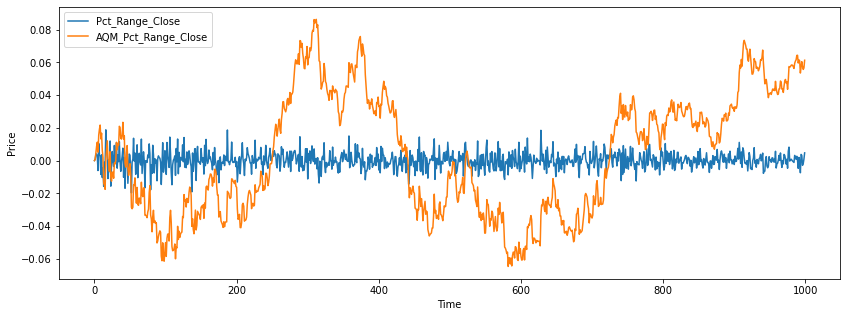

In [53]:
INICIO = 0
FIN = 1000
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['Pct_Range_Close'][INICIO:FIN], label = 'Pct_Range_Close')
pyplot.plot(DATASET_FULL['AQM_Pct_Range_Close'][INICIO:FIN], label = 'AQM_Pct_Range_Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

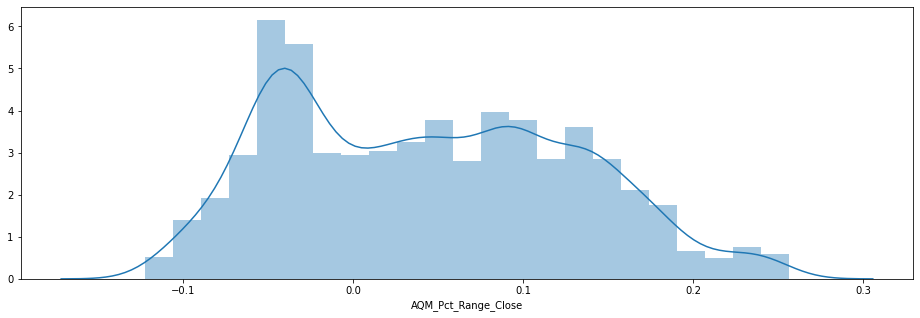

In [54]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['AQM_Pct_Range_Close']);

### Moving Average (MA) Function

In [55]:
#This function add a new column with the MA calculed, with value n
#col_name is the value to be used as base.
def MA(dataset, n, col_name, new_col): 
    MA = pd.Series(dataset[col_name].rolling(n).mean(), name = 'MA_' + col_name +'_'+ str(n)) 
    dataset = dataset.join(MA)  
    return dataset


### Add Col 'MA_Close_5' 

In [56]:
DATASET_FULL = MA(DATASET_FULL,5,'Close','MA_Close_5')
DATASET_FULL['MA_Close_5'].fillna(0, inplace=True)
DATASET_FULL.head(5)

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Spread,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5
0,2004-01-01,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,5.597896e+05,0.00010,Thursday,3,0.000000,0.000000,4.621817e+05,0.000000,0.000000,0.000000
1,2004-01-02,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,1.277971e+06,0.00026,Friday,4,0.000787,0.000787,1.528760e+06,0.000787,0.000787,0.000000
2,2004-01-04,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,8.372040e+04,0.00010,Sunday,6,0.003862,0.003075,1.597559e+06,0.003862,0.004650,0.000000
3,2004-01-05,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,1.353480e+06,0.00010,Monday,0,0.004053,0.000191,2.717248e+06,0.004053,0.008703,0.000000
4,2004-01-06,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,1.354807e+06,0.00010,Tuesday,1,0.002523,-0.001530,3.842691e+06,0.002523,0.011226,1.263726


### Add Col 'MA_Close_25' 

In [57]:
DATASET_FULL = MA(DATASET_FULL,25,'Close','MA_Close_25')
DATASET_FULL['MA_Close_25'].fillna(0, inplace=True)
DATASET_FULL[22:27]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Spread,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25
22,2004-01-27,1.24850,1.26618,1.24403,1.26328,1.086255e+06,1.24834,1.26608,1.24391,1.26318,...,0.00010,Tuesday,1,0.011968,0.018699,2.071395e+07,0.011968,0.005417,1.259666,0.000000
23,2004-01-28,1.26353,1.26425,1.24130,1.24355,1.135121e+06,1.26337,1.26415,1.24113,1.24345,...,0.00010,Wednesday,2,-0.015618,-0.027586,2.184907e+07,-0.015618,-0.010201,1.253988,0.000000
24,2004-01-29,1.24365,1.25265,1.23617,1.24060,1.107885e+06,1.24349,1.25252,1.23607,1.24050,...,0.00010,Thursday,3,-0.002372,0.013246,2.295695e+07,-0.002372,-0.012574,1.250514,1.260862
25,2004-01-30,1.24053,1.24911,1.23506,1.24747,1.076576e+06,1.24037,1.24897,1.23491,1.24731,...,0.00016,Friday,4,0.005538,0.007910,2.403353e+07,0.005538,-0.007036,1.248648,1.260468
26,2004-02-01,1.24751,1.24858,1.24662,1.24731,6.836110e+04,1.24741,1.24848,1.24646,1.24721,...,0.00010,Sunday,6,-0.000128,-0.005666,2.410189e+07,-0.000128,-0.007164,1.248442,1.260027


### Add Col 'MA_Close_50' 

In [58]:
DATASET_FULL = MA(DATASET_FULL,50,'Close','MA_Close_50')
DATASET_FULL['MA_Close_50'].fillna(0, inplace=True)
DATASET_FULL[48:52]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50
48,2004-02-26,1.24955,1.25144,1.23841,1.24419,1.123903e+06,1.24939,1.25129,1.23826,1.24409,...,Thursday,3,-0.004369,0.009504,4.560921e+07,-0.004369,-0.009066,1.253682,1.262206,0.000000
49,2004-02-27,1.24409,1.25063,1.23732,1.24913,1.073263e+06,1.24393,1.25049,1.23718,1.24887,...,Friday,4,0.003970,0.008340,4.668247e+07,0.003970,-0.005096,1.253362,1.262547,1.261704
50,2004-02-29,1.24893,1.25325,1.24738,1.25307,7.518830e+04,1.24823,1.25315,1.24726,1.25297,...,Sunday,6,0.003154,-0.000816,4.675766e+07,0.003154,-0.001941,1.252654,1.262771,1.261619
51,2004-03-01,1.25316,1.25413,1.24228,1.24441,1.122404e+06,1.25300,1.25398,1.24215,1.24431,...,Monday,0,-0.006911,-0.010065,4.788006e+07,-0.006911,-0.008852,1.248090,1.262655,1.261341


### Add Col 'MA_Close_100' 

In [59]:
DATASET_FULL = MA(DATASET_FULL,100,'Close','MA_Close_100')
DATASET_FULL['MA_Close_100'].fillna(0, inplace=True)
DATASET_FULL[48:52]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,weekday,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100
48,2004-02-26,1.24955,1.25144,1.23841,1.24419,1.123903e+06,1.24939,1.25129,1.23826,1.24409,...,3,-0.004369,0.009504,4.560921e+07,-0.004369,-0.009066,1.253682,1.262206,0.000000,0.0
49,2004-02-27,1.24409,1.25063,1.23732,1.24913,1.073263e+06,1.24393,1.25049,1.23718,1.24887,...,4,0.003970,0.008340,4.668247e+07,0.003970,-0.005096,1.253362,1.262547,1.261704,0.0
50,2004-02-29,1.24893,1.25325,1.24738,1.25307,7.518830e+04,1.24823,1.25315,1.24726,1.25297,...,6,0.003154,-0.000816,4.675766e+07,0.003154,-0.001941,1.252654,1.262771,1.261619,0.0
51,2004-03-01,1.25316,1.25413,1.24228,1.24441,1.122404e+06,1.25300,1.25398,1.24215,1.24431,...,0,-0.006911,-0.010065,4.788006e+07,-0.006911,-0.008852,1.248090,1.262655,1.261341,0.0


### Add Col 'MA_Close_150' 

In [60]:
DATASET_FULL = MA(DATASET_FULL,150,'Close','MA_Close_150')
DATASET_FULL['MA_Close_150'].fillna(0, inplace=True)
DATASET_FULL[48:52]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Pct_Range_Close,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100,MA_Close_150
48,2004-02-26,1.24955,1.25144,1.23841,1.24419,1.123903e+06,1.24939,1.25129,1.23826,1.24409,...,-0.004369,0.009504,4.560921e+07,-0.004369,-0.009066,1.253682,1.262206,0.000000,0.0,0.0
49,2004-02-27,1.24409,1.25063,1.23732,1.24913,1.073263e+06,1.24393,1.25049,1.23718,1.24887,...,0.003970,0.008340,4.668247e+07,0.003970,-0.005096,1.253362,1.262547,1.261704,0.0,0.0
50,2004-02-29,1.24893,1.25325,1.24738,1.25307,7.518830e+04,1.24823,1.25315,1.24726,1.25297,...,0.003154,-0.000816,4.675766e+07,0.003154,-0.001941,1.252654,1.262771,1.261619,0.0,0.0
51,2004-03-01,1.25316,1.25413,1.24228,1.24441,1.122404e+06,1.25300,1.25398,1.24215,1.24431,...,-0.006911,-0.010065,4.788006e+07,-0.006911,-0.008852,1.248090,1.262655,1.261341,0.0,0.0


### Add Col 'MA_Close_175' 

In [61]:
DATASET_FULL = MA(DATASET_FULL,175,'Close','MA_Close_175')
DATASET_FULL['MA_Close_175'].fillna(0, inplace=True)
DATASET_FULL[48:52]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Pct_Range_Close_diff,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100,MA_Close_150,MA_Close_175
48,2004-02-26,1.24955,1.25144,1.23841,1.24419,1.123903e+06,1.24939,1.25129,1.23826,1.24409,...,0.009504,4.560921e+07,-0.004369,-0.009066,1.253682,1.262206,0.000000,0.0,0.0,0.0
49,2004-02-27,1.24409,1.25063,1.23732,1.24913,1.073263e+06,1.24393,1.25049,1.23718,1.24887,...,0.008340,4.668247e+07,0.003970,-0.005096,1.253362,1.262547,1.261704,0.0,0.0,0.0
50,2004-02-29,1.24893,1.25325,1.24738,1.25307,7.518830e+04,1.24823,1.25315,1.24726,1.25297,...,-0.000816,4.675766e+07,0.003154,-0.001941,1.252654,1.262771,1.261619,0.0,0.0,0.0
51,2004-03-01,1.25316,1.25413,1.24228,1.24441,1.122404e+06,1.25300,1.25398,1.24215,1.24431,...,-0.010065,4.788006e+07,-0.006911,-0.008852,1.248090,1.262655,1.261341,0.0,0.0,0.0


### Add Col 'MA_Close_200' 

In [62]:
DATASET_FULL = MA(DATASET_FULL,200,'Close','MA_Close_200')
DATASET_FULL['MA_Close_200'].fillna(0, inplace=True)
DATASET_FULL[198:202]

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,AQV,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100,MA_Close_150,MA_Close_175,MA_Close_200
198,2004-08-19,1.23363,1.23791,1.23315,1.23634,1.125597e+06,1.23347,1.23781,1.23305,1.23624,...,1.869588e+08,0.002010,-0.012060,1.235594,1.218696,1.224254,1.214622,1.215247,1.221956,0.000000
199,2004-08-20,1.23655,1.23817,1.22801,1.23179,1.078729e+06,1.23639,1.23804,1.22791,1.23169,...,1.880375e+08,-0.003680,-0.015740,1.234518,1.218937,1.224729,1.215078,1.215132,1.221905,1.226775
200,2004-08-22,1.23158,1.23241,1.22967,1.23109,8.212280e+04,1.23088,1.23231,1.22955,1.23099,...,1.881196e+08,-0.000568,-0.016309,1.233606,1.219812,1.225013,1.215465,1.214985,1.221812,1.226644
201,2004-08-23,1.23140,1.23154,1.21310,1.21496,1.130388e+06,1.23124,1.23140,1.21298,1.21486,...,1.892500e+08,-0.013102,-0.029411,1.229608,1.219988,1.224953,1.215790,1.214789,1.221627,1.226427


### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [63]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F.csv'
print(filename)

EURUSD_FULL_1D_26F.csv


In [64]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)

In [65]:
filename_path

'C:\\Users\\maw\\Documents\\ITESO\\forex_prediction\\Jupyter Notebooks\\IDI4\\dataset_regression\\../../../Datasets/Junio2020/procesados/EURUSD_FULL_1D_26F.csv'